In [56]:
from pprint import pprint
from collections import Counter, defaultdict

from matplotlib import pyplot

from brickmapper import Mapper
from brickmapper.bedes_parser.bedes_parser import BedesParser
from brickmapper.buildingsync.buildingsync_parser import BuildingSyncParser


In [82]:
"""Get BEDES defns"""
bedes = BedesParser('v2.5')
bedes_defns = bedes._get_term_definitions()

bedes_defns

[{'name': 'Assessment Compliance Target Date',
  'category': 'Premises',
  'term_definition': 'Date a premises is expected to achieve assessment recognition, including in the appropriate cases, third party verification'},
 {'name': 'Assessment Eligibility',
  'category': 'Premises',
  'term_definition': 'Eligibility of a premises for assessment recognition.'},
 {'name': 'Assessment Level',
  'category': 'Premises',
  'term_definition': 'Value from assessment programs that produce a descriptive (rather than numeric) rating, such as LEED or NGBS.'},
 {'name': 'Assessment Program',
  'category': 'Premises',
  'term_definition': 'Program which issues energy labels, ratings, or sustainability certifications.'},
 {'name': 'Assessment Program Organization',
  'category': 'Premises',
  'term_definition': 'The name of the body or group providing the verification or certification assessment program. More than one can apply to a premises.'},
 {'name': 'Assessment Program URL',
  'category': 'Prem

In [7]:
"""Get BuildingSync defns"""
buildingsync_parser = BuildingSyncParser()
buildingsync_defns = buildingsync_parser._get_term_definitions()


[{'name': 'BuildingSync', 'term_definition': ''},
 {'name': 'Programs', 'term_definition': ''},
 {'name': 'Program',
  'term_definition': 'Authorized or supported program such as rebate or audit.'},
 {'name': 'ProgramDate',
  'term_definition': 'Date associated with the program.'},
 {'name': 'ProgramFundingSource',
  'term_definition': 'The source of funding or sponsor of the program.'},
 {'name': 'ProgramClassification',
  'term_definition': 'The classification or type of the program.'},
 {'name': 'Facilities', 'term_definition': ''},
 {'name': 'Facility',
  'term_definition': 'A group of sites which contain buildings.'},
 {'name': 'Sites', 'term_definition': ''},
 {'name': 'Site', 'term_definition': ''},
 {'name': 'Systems', 'term_definition': ''},
 {'name': 'HVACSystems', 'term_definition': ''},
 {'name': 'HVACSystem', 'term_definition': ''},
 {'name': 'LightingSystems', 'term_definition': ''},
 {'name': 'LightingSystem', 'term_definition': ''},
 {'name': 'DomesticHotWaterSystems', 

In [4]:
"""Create Mapper"""
mapper = Mapper(
    first_definitions=bedes_defns,
    first_index_file="./indices/bedes.ollama.index",
    second_definitions=buildingsync_defns,
    second_index_file="./indices/buidingsync.ollama.index"
)


2025-01-08 16:57:06.673 | INFO     | brickmapper:populate_external_embeddings:48 - Restoring ./indices/bedes.ollama.index...
2025-01-08 16:57:06.681 | INFO     | brickmapper:populate_external_embeddings:48 - Restoring ./indices/buidingsync.ollama.index...


In [96]:
"""Get Mappings"""
top_k = 3
threshold = .2
results = mapper.get_mappings_with_collisions(top_k, threshold)

results

{'Assessment Compliance Target Date': [('PremisesIdentifier', 0.34789628),
  ('AssessmentYear', 0.36200333),
  ('Assessment', 0.36461657),
  ('Assessments', 0.36775386),
  ('BasicOnsiteAudit', 0.3828302),
  ('ThirdPartyCertification', 0.38308233)],
 'Assessment Eligibility': [('PremisesIdentifier', 0.27837873),
  ('Assessments', 0.3029334),
  ('Assessment', 0.31628472),
  ('AssessmentYear', 0.32361442),
  ('Score', 0.32773948),
  ('OwnershipStatus', 0.34023964)],
 'Assessment Level': [('AssessmentLevel', 0.14490223),
  ('AssessmentValue', 0.237414),
  ('AssessmentProgram', 0.24625278),
  ('Assessments', 0.34211665),
  ('Assessment', 0.3430463),
  ('Score', 0.3534084)],
 'Assessment Program': [('AssessmentProgram', 0.04477614),
  ('AssessmentValue', 0.23182744),
  ('AssessmentLevel', 0.2789986),
  ('ThirdPartyCertification', 0.3191409),
  ('ASHRAEAuditLevel', 0.32577527),
  ('Assessments', 0.32633752)],
 'Assessment Program Organization': [('PremisesName', 0.29883963),
  ('PremisesIdent

the threshold was a distance of 0.7:
	 659 defintitons had 6 results below threshold


here are some of the defintions with no matches:
[]


here's a histogram of score, groups by the rank of the match


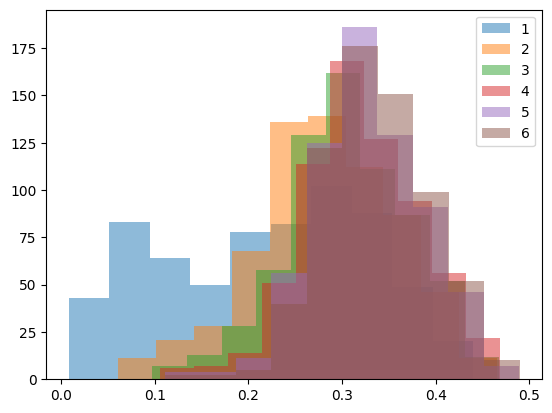

In [97]:
"""Some quick analysis"""

number_of_suggestions_above_threshold = [len(r) for r in results.values()]
print(f"the threshold was a distance of {threshold}:")
for num_results, num_with_num_results in Counter(number_of_suggestions_above_threshold).items():
    print(f"\t {num_with_num_results} defintitons had {num_results} results below threshold")

print("\n\nhere are some of the defintions with no matches:")
pprint([name for name, r in results.items() if len(r) == 0][:5])

scores_by_rank = defaultdict(list)
for r in results.values():
    for rank, (_, score) in enumerate(r):
        scores_by_rank[rank].append(score)

print("\n\nhere's a histogram of score, groups by the rank of the match")
for rank in range(top_k):
    pyplot.hist(scores_by_rank[rank], alpha=0.5, label=rank+1)
    
pyplot.legend(loc='upper right')
pyplot.show()



In [98]:
for rank in range(top_k):
    results_with_rank = [r for r in results.items() if len(r[1]) > rank]
    best_matches = sorted(results_with_rank, key=lambda x: -1 * x[1][rank][1])
    print(f"Some of the best matches for rank {rank + 1} are:")
    pprint([(m[0], m[1][rank]) for m in best_matches[:5]])
    print("\n")


Some of the best matches for rank 1 are:
[('Loan Security', ('SimplePayback', 0.44002783)),
 ('Television Type', ('ReflectorType', 0.43295765)),
 ('Waste Destination', ('UtilityIDs', 0.42992878)),
 ('Display Resolution', ('AspectRatio', 0.42967272)),
 ('Charged Off Reason', ('SimplePayback', 0.42166597))]


Some of the best matches for rank 2 are:
[('Loan Security', ('FoundationWallInsulationCondition', 0.46555686)),
 ('Exemption Reason', ('DiscardReason', 0.4501186)),
 ('Waste Destination', ('EndUse', 0.44569427)),
 ('Display Resolution', ('WindowWidth', 0.44456375)),
 ('Television Type', ('RadiantType', 0.4424429))]


Some of the best matches for rank 3 are:
[('Loan Security', ('ConveyanceSystemCondition', 0.467987)),
 ('Display Resolution', ('OverallWindowToWallRatio', 0.4582126)),
 ('Exemption Reason', ('ExcludedSectionID', 0.4515955)),
 ('Waste Destination', ('MeasureIDs', 0.4482242)),
 ('FICO Score', ('Program', 0.44732636))]


Some of the best matches for rank 4 are:
[('Loan Sec